<a href="https://colab.research.google.com/github/itsmesethus/demo_test/blob/main/T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [40]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
   directory = "/content/drive/MyDrive/aaaaadata/bajwa hospital Eye_diseases_dataset",
   shuffle = True,
   image_size = (256,256),
   batch_size = 32
)

Found 601 files belonging to 4 classes.


In [41]:
class_names = dataset.class_names
class_names

['cataract', 'glaucoma', 'normal', 'retina_disease']

In [42]:
len(dataset)

19

In [43]:
for image_batch,label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())


(32, 256, 256, 3)
[1 2 2 1 2 1 3 1 2 2 2 2 2 0 2 2 2 2 0 0 0 3 0 2 3 2 2 0 3 3 0 2]


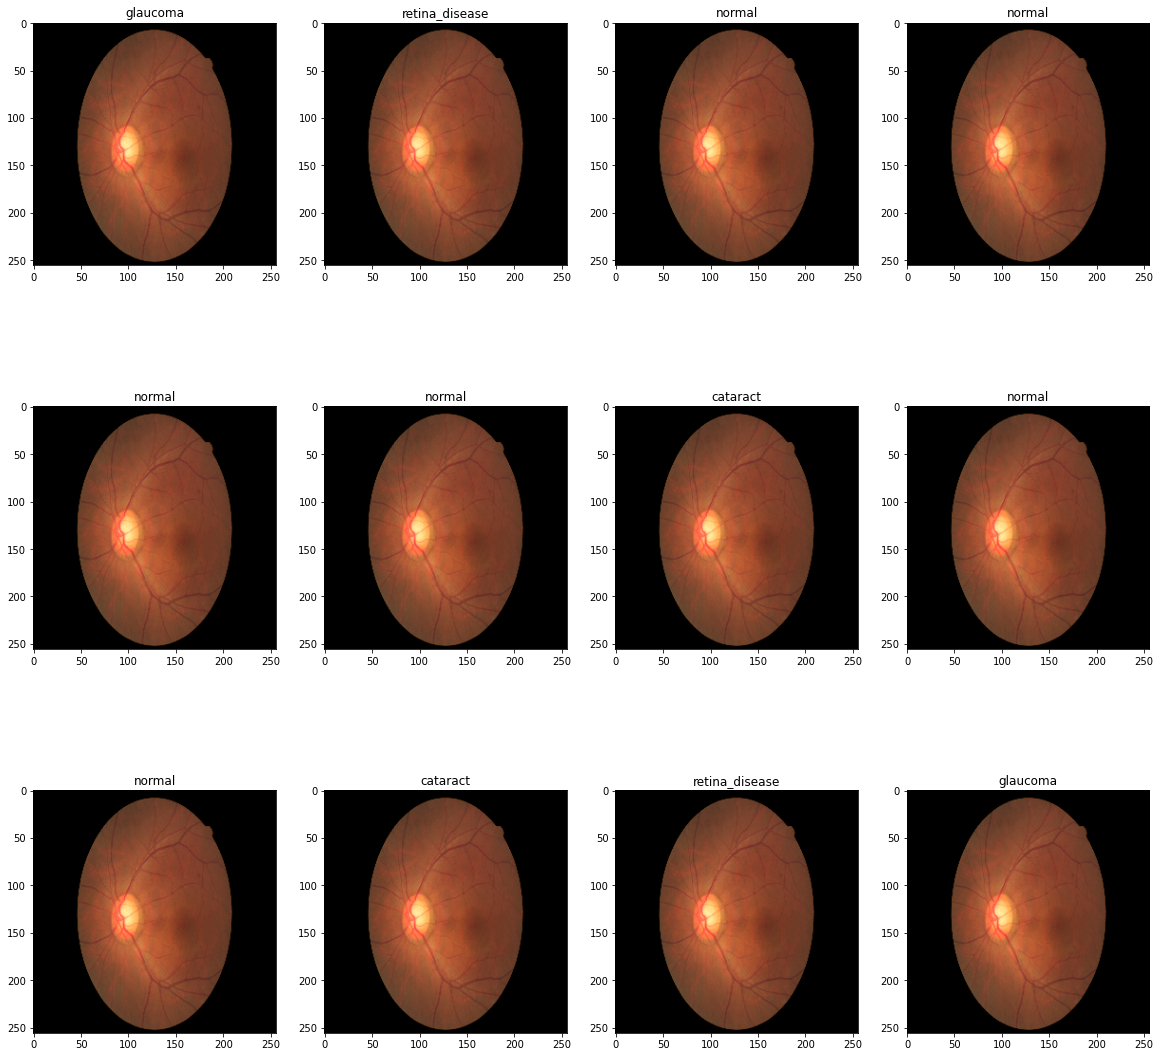

In [61]:
plt.figure(figsize=(20,20))
for image_batch,label_batch in dataset.take(1):   # that 1 is no of batch it gonna take
  for i in range(12):  # 12 is no of img's  that gonna display
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])


In [45]:
len(dataset)

19

In [46]:
'80/10/10  RULE'
train_size =0.8
len(dataset)*train_size


15.200000000000001

In [47]:
train_ds = dataset.take(15) #batches


In [48]:
test_ds = dataset.skip(15)
len(test_ds)

4

In [49]:
val_size = 0.1
len(dataset)*val_size

1.9000000000000001

In [50]:
val_ds= test_ds.take(2)
len(val_ds)

2

In [51]:
test_ds= test_ds.skip(2)
len(test_ds)

2

In [114]:
def get_dataset_partitions_tf(ds,train_split=.75,val_split=0.15,test_split = 0.1,shuffle = True, shuffle_size =10000):
  
  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed =12)

  train_size = int(train_split*ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)

  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).take(val_size)


  return train_ds, val_ds, test_ds

In [115]:
train_ds, val_size, test_ds = get_dataset_partitions_tf(dataset)

In [116]:
print(len(train_ds), len(val_ds), len(test_ds))

14 2 2


In [118]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [119]:
#image preprocessing

resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [120]:
data_agumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(.2)
])

## Model builing --- CNN

In [121]:
model = models.Sequential([
  resize_and_rescale,
  data_agumentation,
  layers.Conv2D( 32, (3,3),activation = 'relu', input_shape = (32,256,256,3)),
  layers.MaxPooling2D((2,2)),

  layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
  layers.MaxPooling2D((2,2)),

  layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
  layers.MaxPooling2D((2,2)),

  layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
  layers.MaxPooling2D((2,2)),

  layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
  layers.MaxPooling2D((2,2)),

  layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
  layers.MaxPooling2D((2,2)),

  layers.Flatten(),
  layers.Dense(64,activation = 'relu'),
  layers.Dense(3, activation = 'softmax')
])



model.build(input_shape=(32,256,256,3))

In [122]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_16 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 sequential_17 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 conv2d_49 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_49 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_50 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                

In [123]:
model.compile(
    optimizer = 'adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics= ['accuracy']
)

In [124]:
history= model.fit(
    train_ds,
    epochs=20,
    batch_size = 32,
    verbose =1,
    validation_data = val_ds
)

Epoch 1/20
14/14 [==============================] - 36s 106ms/step - loss: nan - accuracy: 0.1741 - val_loss: nan - val_accuracy: 0.1562
Epoch 2/20
14/14 [==============================] - 1s 94ms/step - loss: nan - accuracy: 0.1719 - val_loss: nan - val_accuracy: 0.1562
Epoch 3/20
14/14 [==============================] - 1s 93ms/step - loss: nan - accuracy: 0.1719 - val_loss: nan - val_accuracy: 0.1562
Epoch 4/20
14/14 [==============================] - 1s 91ms/step - loss: nan - accuracy: 0.1719 - val_loss: nan - val_accuracy: 0.1562
Epoch 5/20
14/14 [==============================] - 1s 91ms/step - loss: nan - accuracy: 0.1719 - val_loss: nan - val_accuracy: 0.1562
Epoch 6/20
14/14 [==============================] - 1s 92ms/step - loss: nan - accuracy: 0.1719 - val_loss: nan - val_accuracy: 0.1562
Epoch 7/20
14/14 [==============================] - 1s 92ms/step - loss: nan - accuracy: 0.1719 - val_loss: nan - val_accuracy: 0.1562
Epoch 8/20
14/14 [==============================] - 1